In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%run _0_All_functions.ipynb as func

In [2]:
data_path='/Users/sananaz/Desktop/Study2/AIML/GL_python/10_Capstone/input_data.xlsx'
desc_col='Short description'

In [3]:
df=pd.read_excel(data_path)

In [4]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import string, re
stemmer = SnowballStemmer('english') # stemmer
t = str.maketrans(dict.fromkeys(string.punctuation)) # special char removal

In [5]:
#Data cleaning 
from nltk.corpus import stopwords
import re
from math import nan, isnan
#lower case, only alphabets, remove spaces, remove stopwords

df['text_clean'] = df[desc_col].apply(lambda x: str(x).lower())
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub('[^a-zA-z0-9_\s]','',str(x)))
stopwords = set(stopwords.words('english'))
df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split() if word not in stopwords]))
df['text_clean'] = df['text_clean'].apply(lambda x: str(x).strip())
df['text_clean'].dropna(inplace=True)
df['text_clean'] = df['text_clean'].apply(lambda x: 'aa' if len(x) == 0 else x)

                                                                    

In [6]:
from nltk.tokenize import RegexpTokenizer
def _to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [7]:
all_words = list()
for comp in df['text_clean']:
    for w in _to_words(comp):
        all_words.append(w)

In [8]:
all_words

['login',
 'issu',
 'outlook',
 'cant',
 'log',
 'vpn',
 'unabl',
 'access',
 'hr_tool',
 'page',
 'skype',
 'error',
 'unabl',
 'log',
 'engin',
 'tool',
 'skype',
 'event',
 'criticalhostname_221companycom',
 'valu',
 'mountpoint',
 'threshold',
 'oraclesid_37erpdata21',
 'ticket_no1550391',
 'employ',
 'status',
 'new',
 'nonemploye',
 'enter',
 'user',
 'name',
 'unabl',
 'disabl',
 'add',
 'in',
 'outlook',
 'ticket',
 'updat',
 'inplant_874773',
 'engin',
 'tool',
 'say',
 'connect',
 'unabl',
 'submit',
 'report',
 'hr_tool',
 'site',
 'load',
 'page',
 'correct',
 'unabl',
 'login',
 'hr_tool',
 'sgqsuojr',
 'wbesorf',
 'card',
 'user',
 'want',
 'reset',
 'password',
 'unabl',
 'open',
 'payslip',
 'ticket',
 'updat',
 'inplant_874743',
 'unabl',
 'login',
 'compani',
 'vpn',
 'undock',
 'pc',
 'screen',
 'come',
 'back',
 'erp',
 'sid_34',
 'account',
 'lock',
 'unabl',
 'sign',
 'vpn',
 'unabl',
 'check',
 'payslip',
 'vpn',
 'issu',
 'unabl',
 'connect',
 'vpn',
 'user',
 '

In [9]:
index_dict = dict()
count = 1
index_dict['<unk>'] = 0
for word in set(all_words):
    index_dict[word] = count
    count += 1
len(index_dict)

7976

In [10]:
index_dict

{'<unk>': 0,
 'servermigr': 1,
 'refrenc': 2,
 '0945': 3,
 'khfjzyto': 4,
 'cuibfgna': 5,
 '08232016': 6,
 'ticket': 7,
 'beenefit': 8,
 'pu4': 9,
 'post': 10,
 'role': 11,
 'rahmen': 12,
 'adwind': 13,
 '1051': 14,
 'verlngern': 15,
 'comment': 16,
 '1016': 17,
 'via': 18,
 'crm6500072137': 19,
 '045300': 20,
 'stall': 21,
 'jesjnlyenmrest34': 22,
 'archiving_tool': 23,
 'bfnvjgd': 24,
 '181000': 25,
 'mccoyimg': 26,
 'mtb': 27,
 'possibl': 28,
 'hostname_1010': 29,
 'job_482': 30,
 'helftgyldt': 31,
 '154am': 32,
 'fc': 33,
 '09112016': 34,
 'ir': 35,
 'forecast': 36,
 'plant_3': 37,
 'abap': 38,
 'we_wu106': 39,
 'ticket_no0431842': 40,
 'pasword': 41,
 'ticket_no1556096': 42,
 'ticket_no1538187cpp': 43,
 'revenu': 44,
 'inplant_850503': 45,
 'rtr': 46,
 'usadnbvpnrtr1038111': 47,
 'intern': 48,
 '103800': 49,
 'call': 50,
 '4000': 51,
 'fehlversuch': 52,
 '065000': 53,
 'job_1132': 54,
 'inq': 55,
 'plant_269': 56,
 'concal': 57,
 'cl_75': 58,
 'eror': 59,
 'deposit': 60,
 '213900'

In [11]:
import gensim 
from gensim.scripts.glove2word2vec import glove2word2vec 
from gensim.test.utils import datapath, get_tmpfile 

#glove_file = datapath('glove.6B.300d.txt')
#glove_file_new_format = get_tmpfile('test_word2vec')
embeddings_index = {}
f = open('glove.6B.300d.txt') # GLOBAL VECTOR
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [116]:
data_list = list()
for comp in df['text_clean']:
    sentence = np.zeros(300)
    count = 0
    for w in _to_words(comp):
        try:
            sentence += embeddings_index[w]
            count += 1
        except KeyError:
            continue
    data_list.append(sentence / count)

/Users/sananaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [117]:
len(data_list)

8500

In [118]:
df['text_clean'].shape

(8500,)

In [126]:
data_list2=np.nan_to_num(data_list)

In [127]:
print(np.any(np.isnan(data_list2)))
print(np.all(np.isfinite(data_list2)))

False
True


In [133]:
import sklearn.metrics
cosine_similarities = sklearn.metrics.pairwise.cosine_similarity(data_list2)

In [135]:
cosine_similarities.shape

(8500, 8500)

In [137]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=0).fit(data_list2)
kmeans.labels_
kmeans.cluster_centers_

array([[ 0.06241975,  0.47120658,  0.11473287, ..., -0.37949394,
        -0.12011737,  0.08433677],
       [-0.32235895, -0.02414089, -0.12182794, ...,  0.13839627,
        -0.03573293, -0.19281937],
       [-0.06465822,  0.17685176,  0.10542249, ...,  0.09027597,
         0.24466067, -0.08659645],
       ...,
       [-0.3125132 , -0.06004902, -0.22147269, ...,  0.31859142,
         0.04029829, -0.03816783],
       [-0.47973999,  0.093277  , -0.44665   , ..., -0.40103999,
         0.0041243 ,  0.047944  ],
       [-0.1406288 , -0.51015952,  0.01414464, ...,  0.06598267,
         0.05242913, -0.0382887 ]])

In [138]:
kmeans.labels_

array([ 7, 19, 17, ...,  5, 15, 12], dtype=int32)

In [139]:
kmeans.labels_.size

8500

In [143]:
df['Cluster']=pd.DataFrame(kmeans.labels_, columns=['Cluster'])

In [144]:
df.head()

,Short description,Description,Caller,Assignment group,text_clean,Cluster
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issu,7
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook,19
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log vpn,17
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unabl access hr_tool page,4
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,6


In [148]:
df.sort_values(by='Cluster').to_csv('Cluster.csv')

In [151]:
df.groupby(['Cluster']).count()

,Short description,Description,Caller,Assignment group,text_clean
Cluster,,,,,
0,806,806,806,806,806
1,269,268,269,269,269
2,238,238,238,238,238
3,152,152,152,152,152
4,233,233,233,233,233
5,601,601,601,601,601
6,131,131,131,131,131
7,127,127,127,127,127
8,138,138,138,138,138


(806, 6)


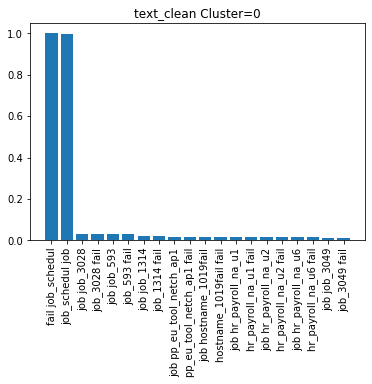

(269, 6)


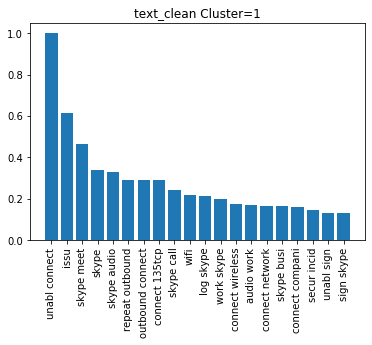

(238, 6)


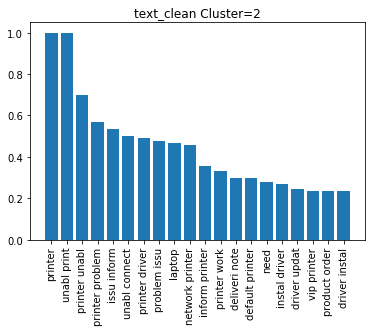

(152, 6)


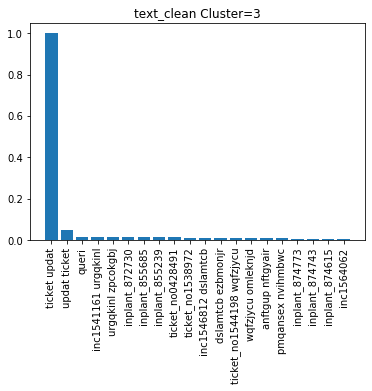

(233, 6)


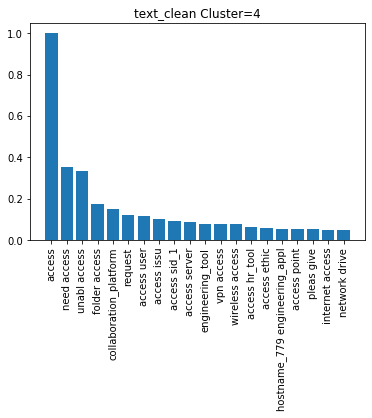

(601, 6)


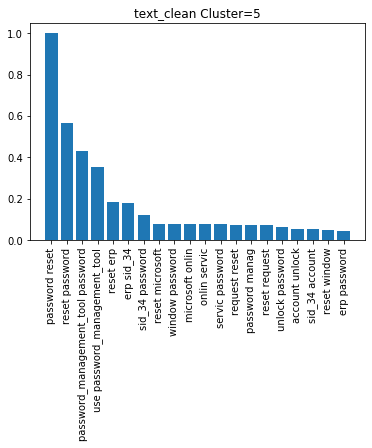

(131, 6)


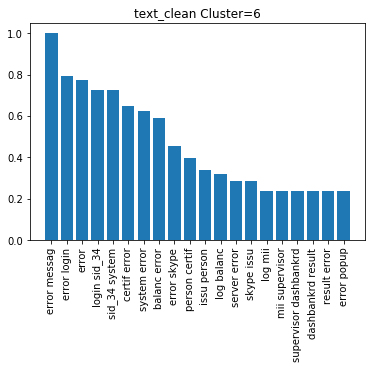

(127, 6)


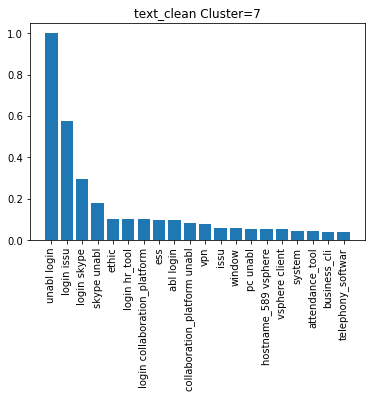

(138, 6)


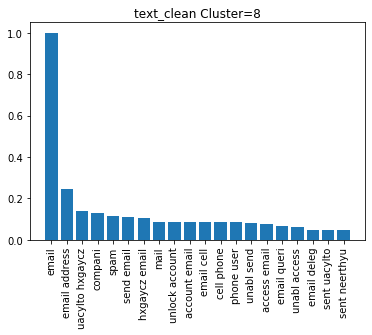

(153, 6)


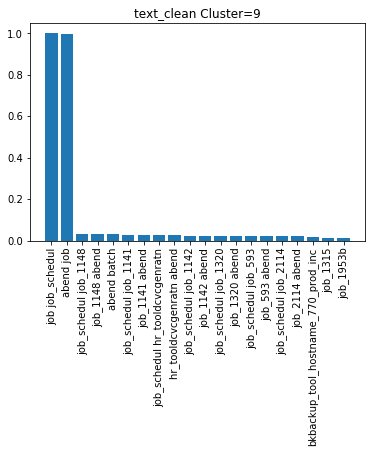

(1366, 6)


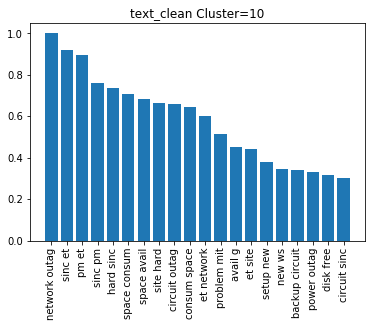

(675, 6)


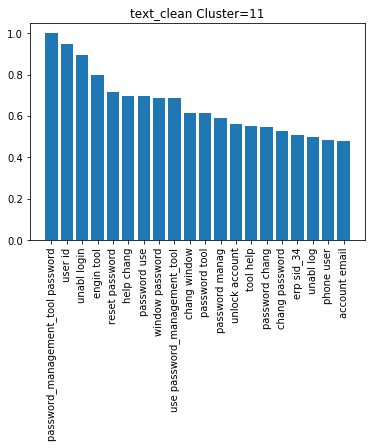

(192, 6)


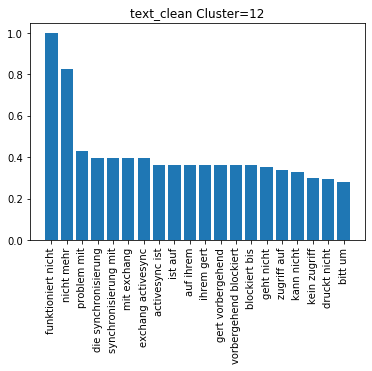

(505, 6)


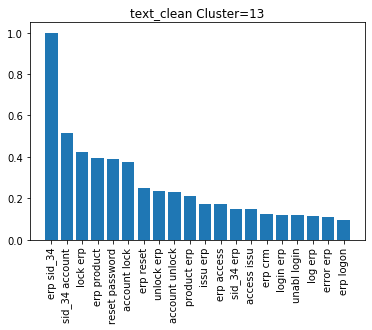

(1371, 6)


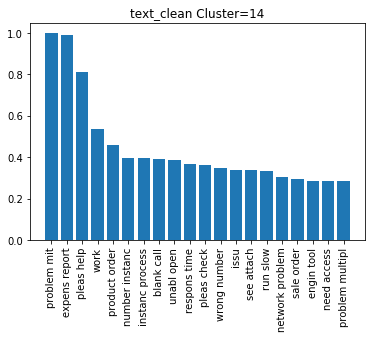

(867, 6)


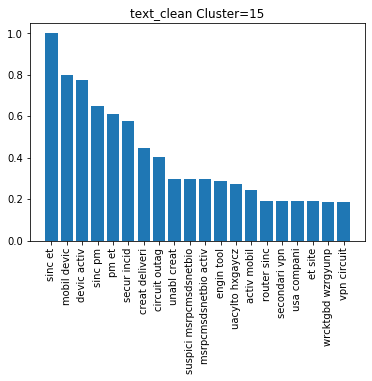

(269, 6)


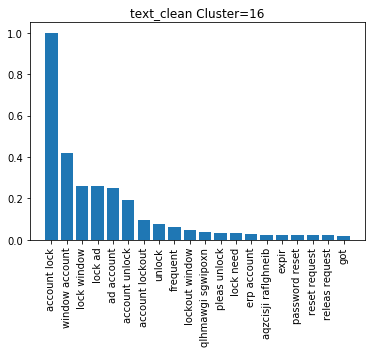

(107, 6)


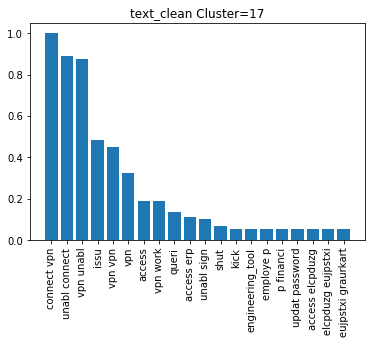

(47, 6)


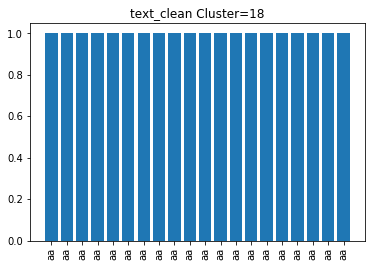

(253, 6)


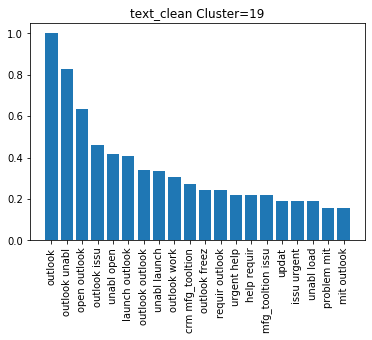

In [157]:
for i in range(20):
    Visualize_Word_Cloud(df, text_col="text_clean", filter_column="Cluster", filter_value=i,plot_freq=1,plot_wordCloud=0)


https://github.com/brannondorsey/GloVe-experiments/blob/master/word_clustering.py